

# Project: Movie Data Analysis- [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset has been compiled from the The movie Database including their ratings and revenues. The dataset also contains the casts but in this case i wont be using the specific column. The casts are a list of the people who took part in acting the movie. Additionally it contains the directors of different movies, the movies popularity and also the movies homepage. 

### Question(s) for Analysis
##>What are the different genres available?
##> Stars with their respective number of movies
##> Movies with highgest and lowest revenue?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
 Here we are going to clean our data and get an easy dataset to work with

### General Properties

In [85]:
# Loading my dataset

df= pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [86]:
## We are gonna see the shape of the data
df.shape

(10866, 21)

In [87]:
## the statistics of the data
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

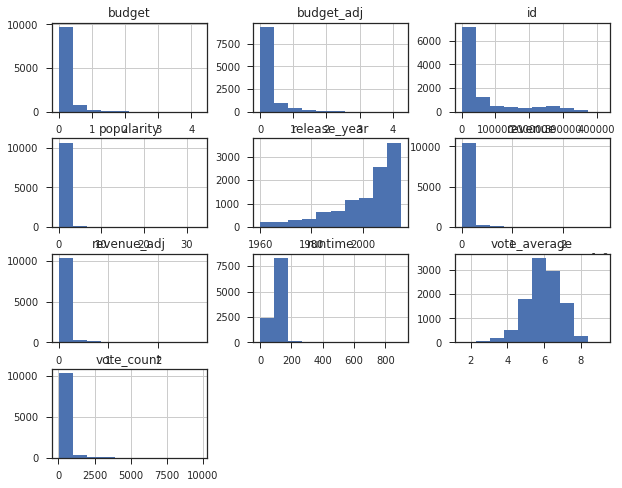

In [89]:
df.hist(figsize=(10,8));


### Data Cleaning
> In this step we are just gonna do some data cleaning by removing what we are not going to use and make the data easier to work with

In [90]:
# We are going to drop some columns since we wont be using them
df.drop(['id','imdb_id','popularity','homepage','director','tagline','keywords','overview','runtime','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'], axis= 1, inplace= True)

In [91]:
df.head()

,budget,revenue,original_title,cast,genres
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller


In [92]:
##shape of the dataset after all the columns that we are not going to use have been dropped
df.shape

(10866, 5)

In [93]:
# we are going to see if there are any duplicates in our dataset
df.duplicated().sum()

1

In [94]:
## we are gonna drop all our duplicates
df.drop_duplicates(keep='first', inplace=True)

In [95]:
## we are just going to view the shape of the remaining dataset
df.shape

(10865, 5)

In [96]:
## Removing the 0's

xf_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[xf_list] = df[xf_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = xf_list, inplace = True)


In [97]:
df.shape

(3854, 5)

In [99]:
#changing the data type
change_type=['budget', 'revenue']
df[change_type]=df[change_type].applymap(np.int64)
df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
genres            object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
We are going to look deep into the data

### Different genres available

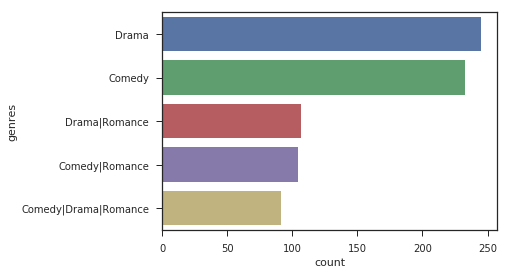

In [100]:
df_gn=df['genres'].value_counts()
df_gn=pd.DataFrame(df_gn).reset_index()
df_gn.columns=['genres','count']
sns.barplot(y= 'genres', x='count', data=df_gn.head())



<a id='explanation'></a>
From the chart above we can see that the graph does not clearly rate every other genre in details since some of them were separeted by (|) . So we need to remove (|) to get a proper breakdown and i'm going to do that by defining the data. With our table above it is quite hard to draw a proper conclusion.

In [101]:
# further definition of genres 
def data(column):
    
    data = df[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

Text(0.5,1,'Genres Ranking')

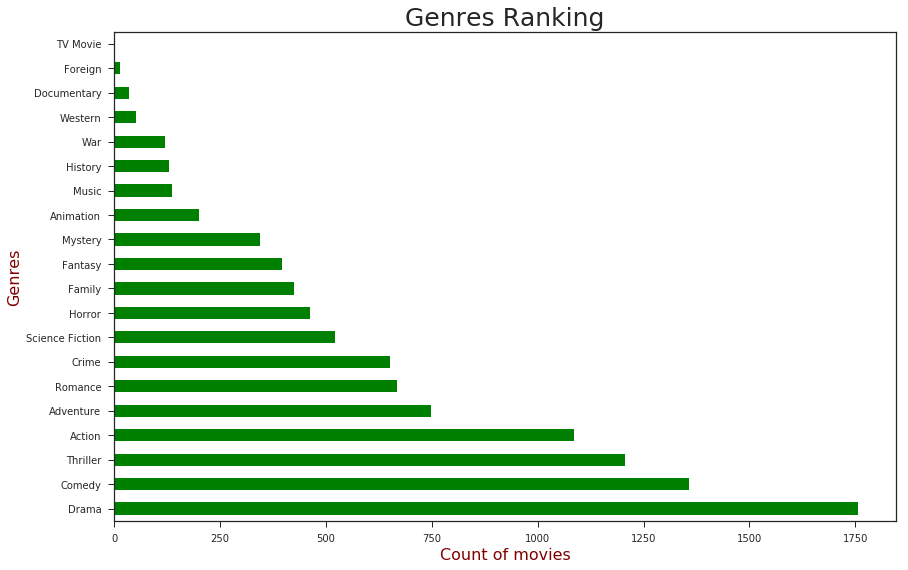

In [79]:
## The chart below will further define genres

count=data('genres')
count.head()
l=count.plot(kind="barh",color="green")
l.figure.set_size_inches(14, 9)
#on yaxis
l.set_ylabel('Genres', color = 'maroon', fontsize = '16')
# on x axis
l.set_xlabel('Count of movies', color = 'maroon', fontsize = '16',)
plt.title("Genres Ranking",size=25)

<a id='conclusions'></a>
>*From the data aove we can gather that most movies are drama which was highely rated followed by comedy. I would recommend that when one is creating a movies should consider these specific genres for better returns*

### Which star has the most movies?


In [117]:
count=data('cast')
count.head()


Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

From the data we can gather that Rober De Niro has the highest number of movies wich is 52 followed by Bruce Willis at 46. 

### movies with highest and lowest revenues

In [102]:
# calculate revenue
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()

    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


In [103]:
# different budgets of the movies
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


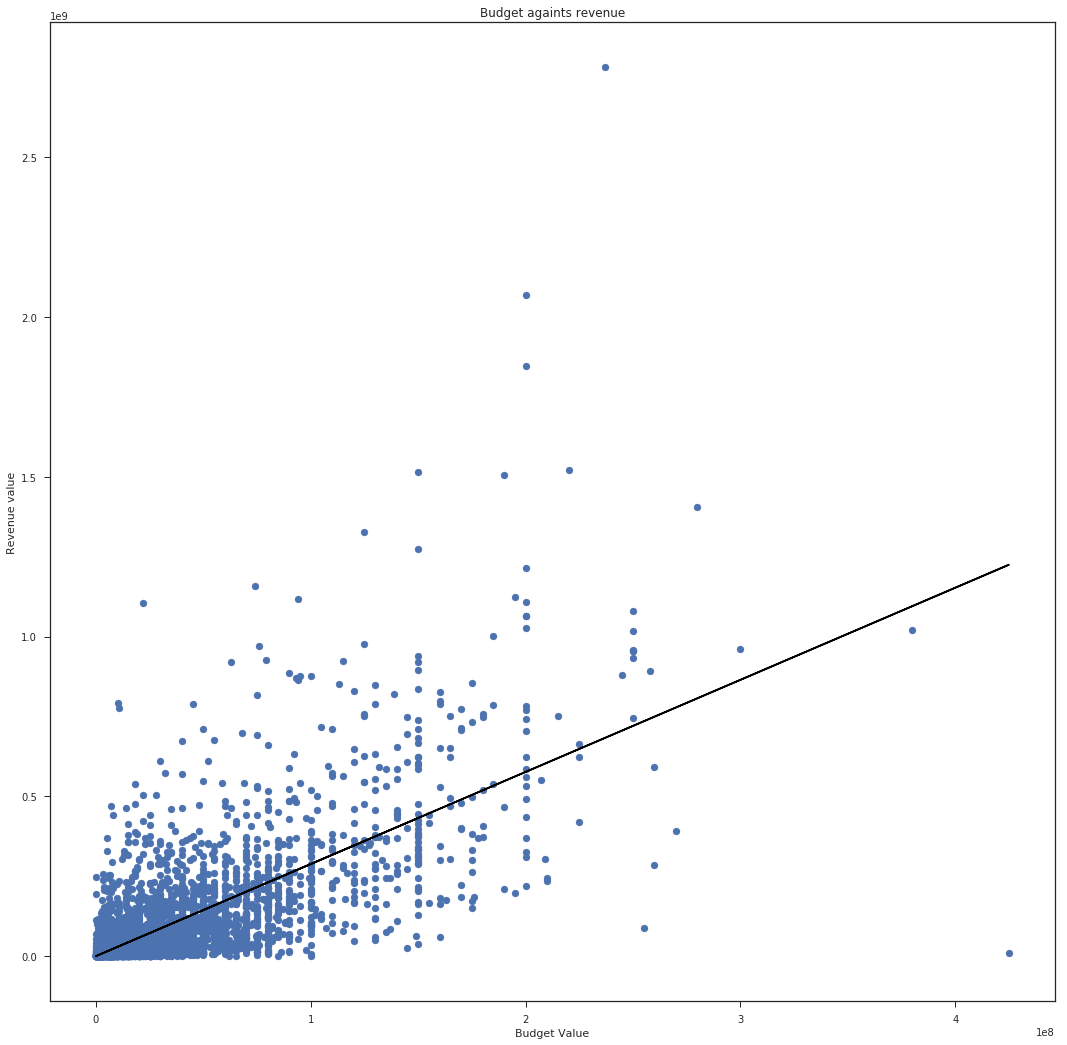

In [104]:
# association between budget and revenue
plt.figure(figsize = (18, 18))
plt.title('Budget againts revenue')
plt.xlabel("Budget Value")
plt.ylabel("Revenue value")
graph = plt.scatter(df['budget'], df['revenue'])

plt.plot(df['budget'], np.poly1d(np.polyfit(df['budget'], df['revenue'], 1))(df['budget']), color = 'black')


plt.show()

<a id='conclusions'></a>
> the graph above shows that their is a correlation between budget and revenue. We can see a high revenue movie is also associated with a high budget 


<a id='conclusions'></a>
## Conclusions

> The dataset had different genres and we can see that drama has the highest rating.
From our dataset we can gather that Avatar had the highest revenue compared to its budget while shattered glass had a lower revenue. We can also gather that most movies must come from genres such as comedy, drama. action and romance.
Additionally we can see the least budgeted movie was lost and found and the most budgeted movie was The warriors way

## Limitations

>the dataset does not indicate the currency unit which makes it hard to make a conclusive report on their associations which was determoin 



In [139]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0